Assignment 4

In [1]:
# Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
fid = drive.ListFile({'q':"title='pubg - Dr. Darshan Ingle.csv'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('pubg - Dr. Darshan Ingle.csv')

In [71]:
#1. Read the dataset
data = pd.read_csv('pubg - Dr. Darshan Ingle.csv')

In [5]:
print(data.shape)
data.head()

(10000, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,1126,0,0,0.000,1376,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,1309,1,1,6.589,1370,squad-fpp,28,28,-1,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,0,2,1,23.070,1381,squad-fpp,29,27,1479,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,0,1,1,24.890,1708,squad,27,25,1500,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,1332,0,0,0.000,1807,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


In [6]:
#2. Check the datatype of all the columns.
for i in data.columns:
  print("{}   \t {} ".format(i, type(data[i][0])))

Id   	 <class 'str'> 
groupId   	 <class 'str'> 
matchId   	 <class 'str'> 
assists   	 <class 'numpy.int64'> 
boosts   	 <class 'numpy.int64'> 
damageDealt   	 <class 'numpy.float64'> 
DBNOs   	 <class 'numpy.int64'> 
headshotKills   	 <class 'numpy.int64'> 
heals   	 <class 'numpy.int64'> 
killPlace   	 <class 'numpy.int64'> 
killPoints   	 <class 'numpy.int64'> 
kills   	 <class 'numpy.int64'> 
killStreaks   	 <class 'numpy.int64'> 
longestKill   	 <class 'numpy.float64'> 
matchDuration   	 <class 'numpy.int64'> 
matchType   	 <class 'str'> 
maxPlace   	 <class 'numpy.int64'> 
numGroups   	 <class 'numpy.int64'> 
rankPoints   	 <class 'numpy.int64'> 
revives   	 <class 'numpy.int64'> 
rideDistance   	 <class 'numpy.float64'> 
roadKills   	 <class 'numpy.int64'> 
swimDistance   	 <class 'numpy.float64'> 
teamKills   	 <class 'numpy.int64'> 
vehicleDestroys   	 <class 'numpy.int64'> 
walkDistance   	 <class 'numpy.float64'> 
weaponsAcquired   	 <class 'numpy.int64'> 
winPoints   	 <cl

In [7]:
#3. Find the summary of all the numerical columns and write your findings about it.
data.describe() #considers only numerical columns

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,23.272333,1575.398000,44.655500,43.151300,889.699600,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,50.536262,258.963515,23.800859,23.272567,738.535034,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,464.000000,2.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1431.500000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,22.345000,1849.250000,49.000000,47.000000,1500.000000,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,538.600000,2202.000000,100.000000,100.000000,2835.000000,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


In [ ]:
data.hist(figsize = (30,30));
plt.show

Findings about data:

In [19]:
#4. The average person kills how many players?
np.mean(data.kills)

0.9134

In [27]:
#5. 99% of people have how many kills?


In [18]:
#6. The most kills ever recorded are how much?
np.max(data.kills)

35

In [29]:
#7. Print all the columns of the dataframe.
list(data.columns)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc',
 'log_walkDistance']

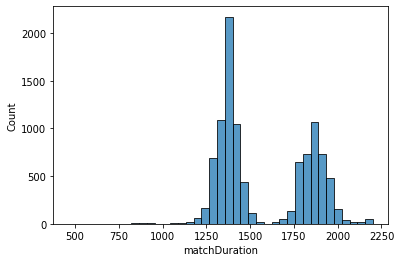

In [11]:
#8. Comment on distribution of the match's duration. Use seaborn.
sns.histplot( data['matchDuration'] );

The above histogram shows bimodal distribution i.e. two peaks in the graph indicate that we 'might be' combining subgroups that have different characteristics.

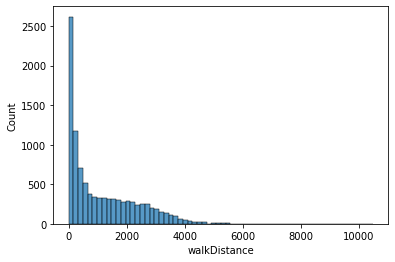

In [34]:
#9. Comment on distribution of the walk distance. Use seaborn.
sns.histplot( data['walkDistance'] );

walkDistance variables are heavily right-skewed. To better show these variables in future plots, we can transform these columns by taking the logarithm of the values:

data['log_walkDistance'] = np.log10(data['walkDistance']);

// Drop the non-transformed column as: 
data = data.drop(columns = ['walkDistance'])

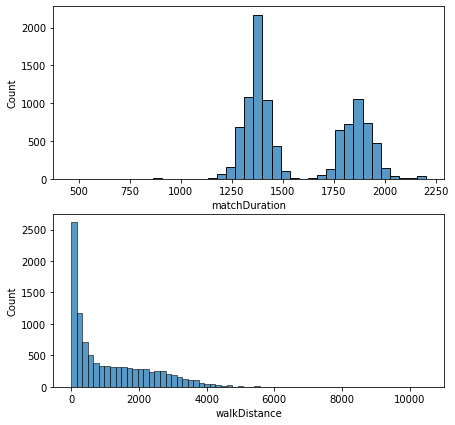

In [35]:
#10. Plot distribution of the match's duration vs walk distance one below the other.
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
sns.histplot( data['matchDuration'] )

plt.subplot(2,1,2)
sns.histplot( data['walkDistance'] );

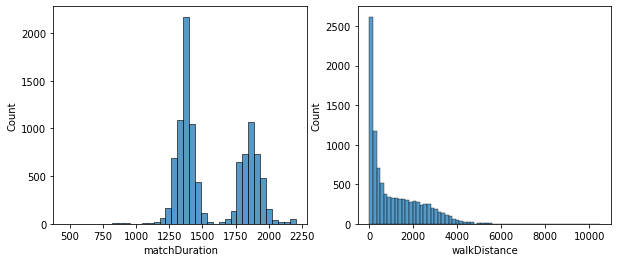

In [36]:
#11. Plot distribution of the match's duration vs walk distance side by side.
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot( data['matchDuration'] )

plt.subplot(1,2,2)
sns.histplot( data['walkDistance'] );

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


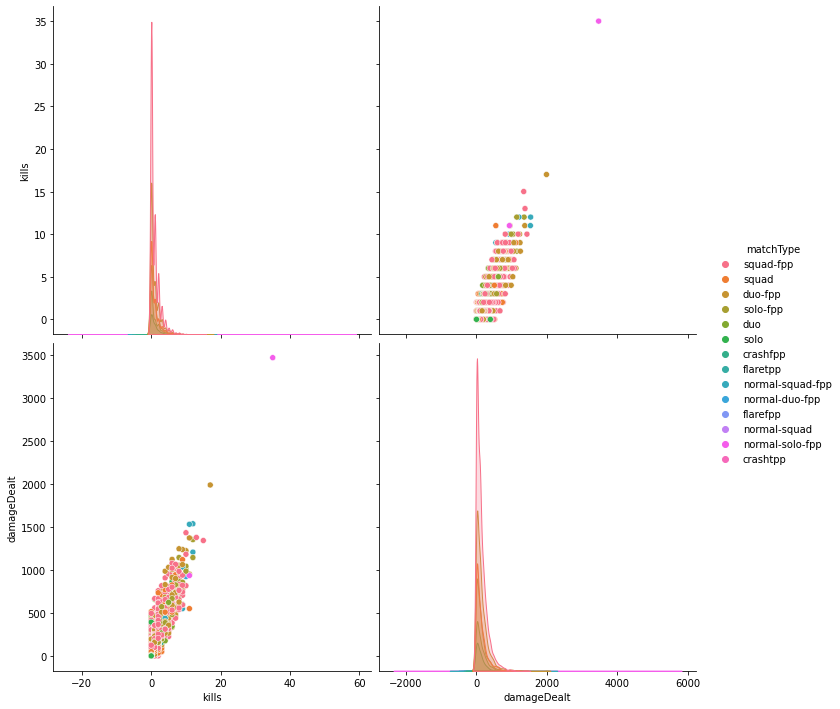

In [44]:
#12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.
sns.pairplot(data, x_vars=["kills", "damageDealt"], 
    y_vars=["kills", "damageDealt"], height = 5, hue = 'matchType');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


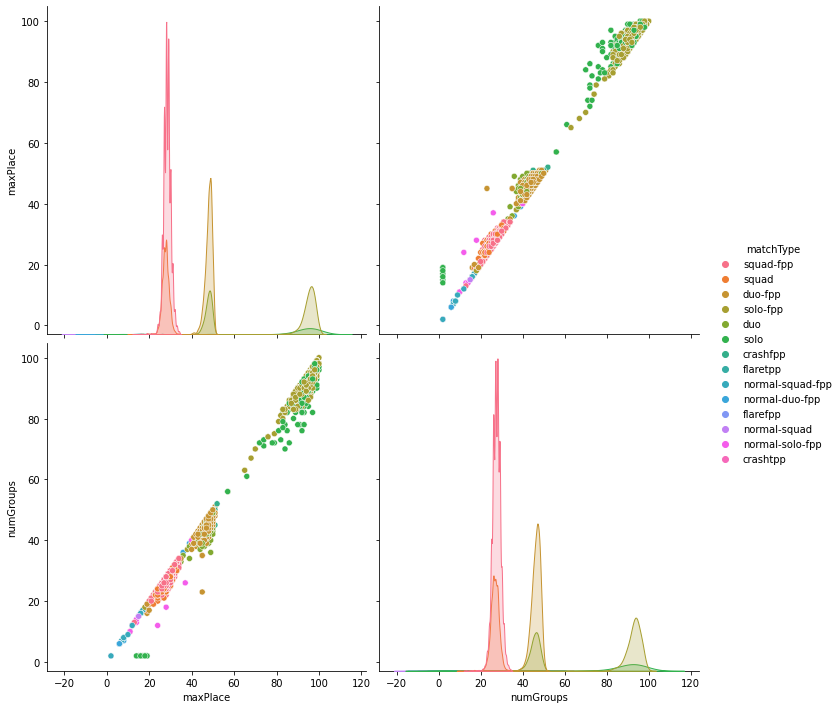

In [41]:
sns.pairplot(data, x_vars=["maxPlace", "numGroups"],
    y_vars=["maxPlace", "numGroups"], height = 5, hue = 'matchType');

Highly positive correlation between maxPlace and numGroups

In [17]:
#13. How many unique values are there in 'matchType' and what are their counts?
li = data.matchType.value_counts()
print(len(li))
print(li)

14
squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
crashfpp              13
normal-duo-fpp        13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64


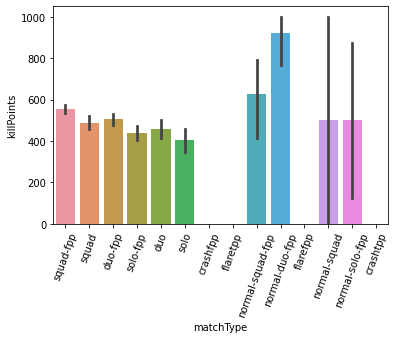

In [46]:
#14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.
sns.barplot(x='matchType', y='killPoints', data=data,);
plt.xticks(rotation=70);

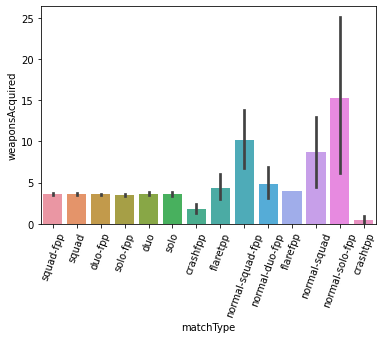

In [52]:
#15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.
sns.barplot(x='matchType', y='weaponsAcquired', data=data);
plt.xticks(rotation=70);

In [ ]:
#16. Find the Categorical columns.

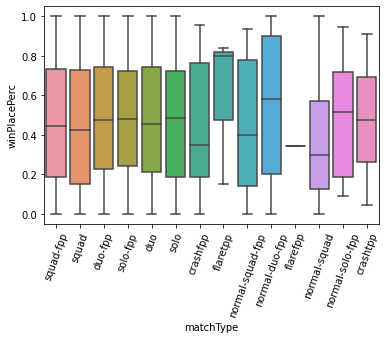

In [49]:
#17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.
sns.boxplot(x='matchType', y='winPlacePerc', data=data);
plt.xticks(rotation=70);

*   The long boxes indicate that there is a great variablitity in the values from mean
*   Most of the values are fairly symmetrically distributed
*   In the case of flaretpp, flarefpp and normal-solo-fpp there are anomalies
*   On checking the counts for each subgroup, we find that it is very low. Hence the effect in the boxplot
*   crashfpp though, is slightly skewed

In [57]:
data['matchType'].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
crashfpp              13
normal-duo-fpp        13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

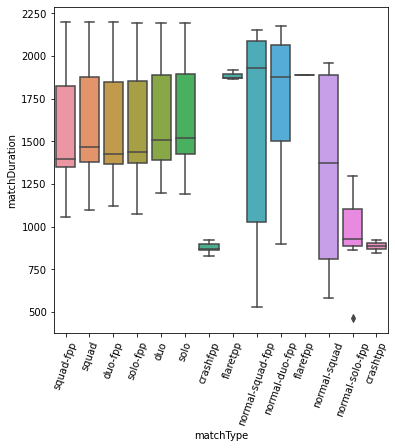

In [65]:
#18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.
plt.figure( figsize = (6,6))
sns.boxplot(x='matchType', y='matchDuration', data=data);
plt.xticks(rotation=70);

*   The median lines in the inter-quartile boxes are significantly biased towards the lower end which shows that the values are positively/right skewed. However, normal-squad-fpp and normal-duo-fpp are left skewed.
*   Generally, taking logarithm fixes the skewness of data sufficiently.
*   We can spot an outlier in matchType 'normal-solo-fpp'
*   the distributions of crashfpp, flaretpp and crashtpp are quite condensed meaning the variablitity of these matchTypes is less.

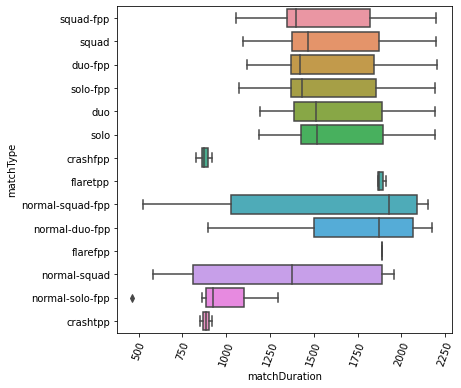

In [66]:
#19. Change the orientation of the above plot to horizontal.
plt.figure( figsize = (6,6))
sns.boxplot(y='matchType', x='matchDuration', data=data, orient="h");
plt.xticks(rotation=70);

In [74]:
#20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills, teamKills, roadKills.
data['KILL'] = data['headshotKills']+data['teamKills']+data['roadKills']
print(data.shape)
data.head()

(10000, 30)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,1126,0,0,0.000,1376,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,1309,1,1,6.589,1370,squad-fpp,28,28,-1,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,0,2,1,23.070,1381,squad-fpp,29,27,1479,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,0,1,1,24.890,1708,squad,27,25,1500,0,0.0,0,0.0,0,0,332.7,3,0,0.3462,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,1332,0,0,0.000,1807,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690,0


In [75]:
#21. Round off column ‘winPlacePerc’ to 2 decimals.
data['winPlacePerc'] = np.round(data['winPlacePerc']);
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,1126,0,0,0.000,1376,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,0.0,0,1470,0.0,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,1309,1,1,6.589,1370,squad-fpp,28,28,-1,0,0.0,0,0.0,0,0,132.7,2,1531,0.0,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,0,2,1,23.070,1381,squad-fpp,29,27,1479,3,0.0,0,0.0,0,0,3591.0,10,0,1.0,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,0,1,1,24.890,1708,squad,27,25,1500,0,0.0,0,0.0,0,0,332.7,3,0,0.0,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,1332,0,0,0.000,1807,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,252.7,3,1557,0.0,0


In [85]:
#22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean.
#Plot it on a histogram and comment on its distribution.
sample = data['damageDealt']
sample.columns = ['damageDealt']

In [112]:
def plot_hist(start,stop):
  temp = sample.iloc[start:stop]
  print(np.mean(temp))
  start += 50
  stop += 50
  plt.figure(figsize = (3,3))
  plt.hist(temp, alpha = 0.5, color='#4ca3dd')

149.0892
167.23420000000002
134.678
127.96140000000003
120.45980000000002
145.81080000000003
137.96439999999998
114.0642
154.814
124.63864
126.199
134.53300000000002
111.4818
152.11922
102.2094
147.73363999999998
108.15400000000001
148.40601999999998
199.04240000000004
152.40079999999998
125.26960000000001
114.83635999999998
120.51360000000001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


130.7686
109.1986
147.87300000000002
156.88619999999997
111.59020000000002
148.14384400000003
117.54794599999997
109.50540000000001
161.73744000000002
137.685
141.15740000000002
119.94573999999999
118.58600000000003
100.48
119.06800000000003
128.13559999999998
159.26820000000004
127.7018
96.5132
118.57839999999999
132.29100000000005
170.4476
116.77456000000002
102.2692
105.4508
126.70139999999996
185.44459999999995
162.2046
171.0596
91.01549999999999
124.70620000000001
106.71859999999998
137.70119999999997
140.82
167.37199999999996
122.97020000000002
111.17452000000002
161.28043999999997
121.5496
102.27460000000002
108.21916999999998
126.18678
105.46619999999999
147.33520000000001
129.3092
153.09339999999997
129.02979999999997
174.24672
130.20159999999998
116.63800000000003
86.55624000000002
152.7726
135.0546
145.64419999999996
81.5574
166.5452
137.03600000000003
91.89919999999998
99.36879999999998
128.73959999999997
126.46660000000001
118.12320000000001
122.42494
120.31379999999999
95

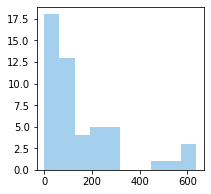

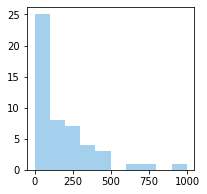

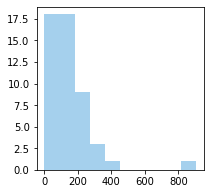

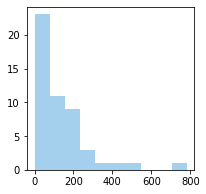

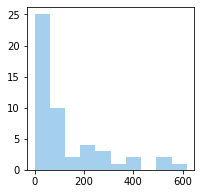

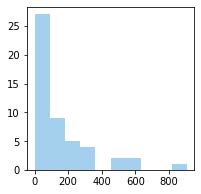

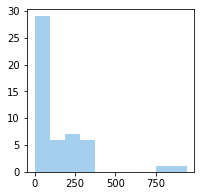

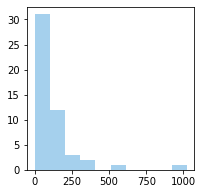

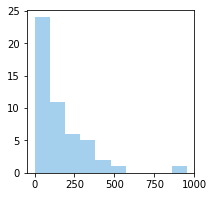

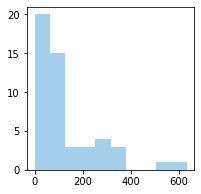

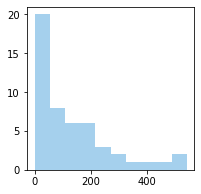

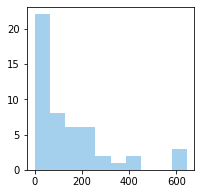

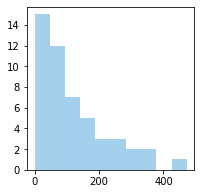

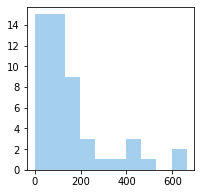

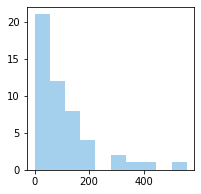

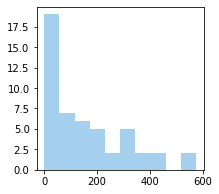

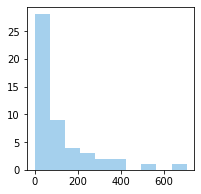

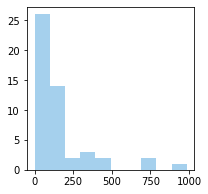

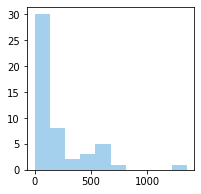

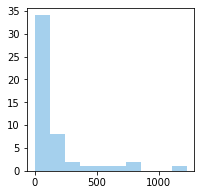

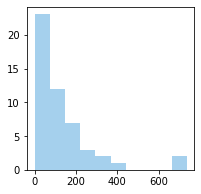

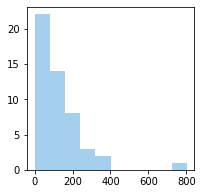

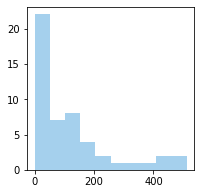

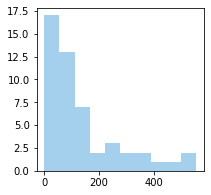

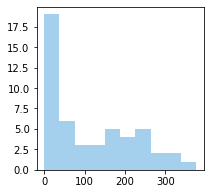

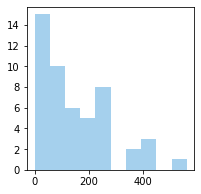

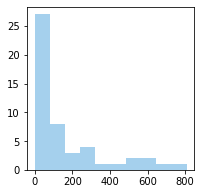

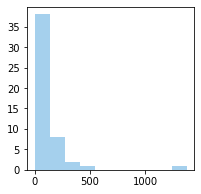

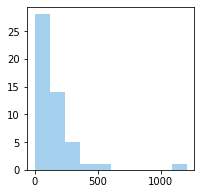

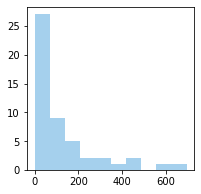

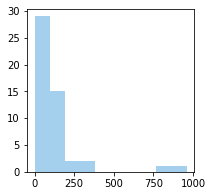

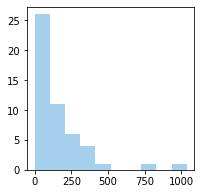

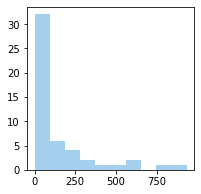

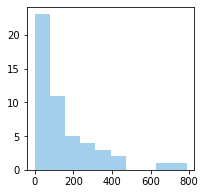

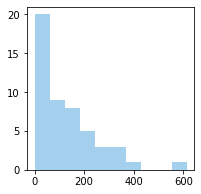

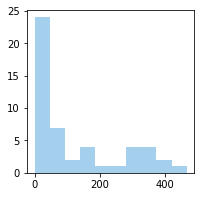

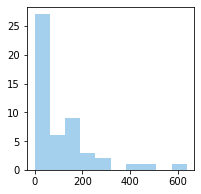

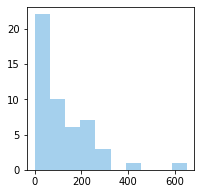

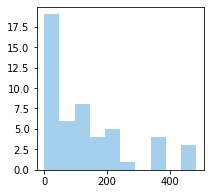

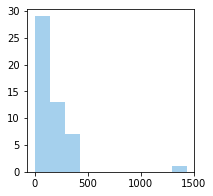

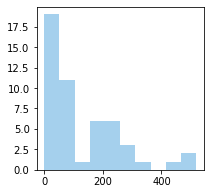

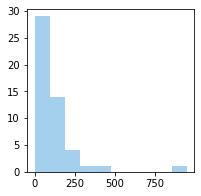

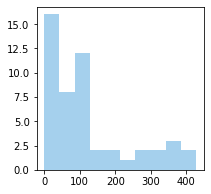

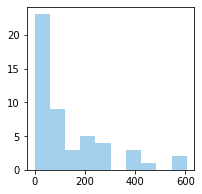

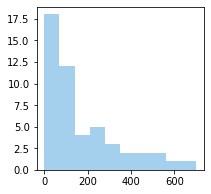

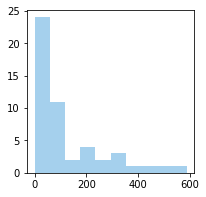

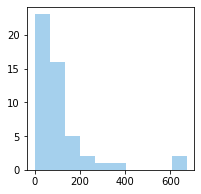

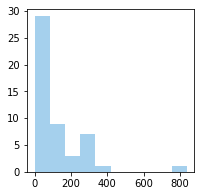

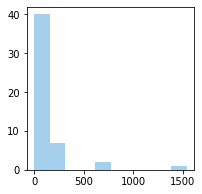

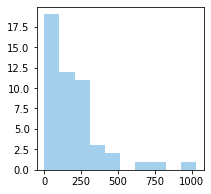

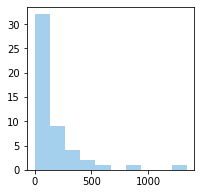

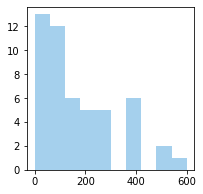

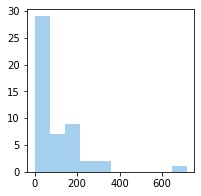

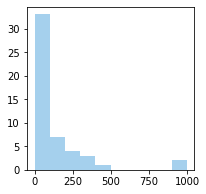

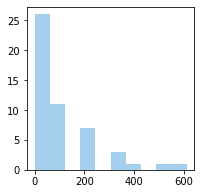

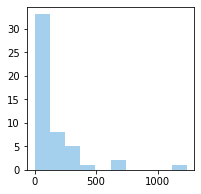

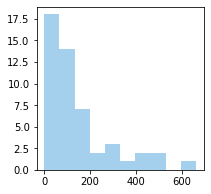

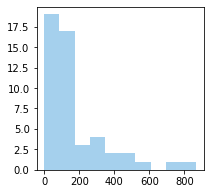

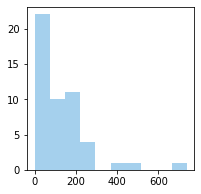

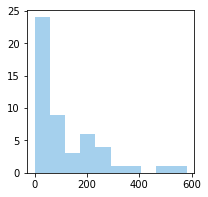

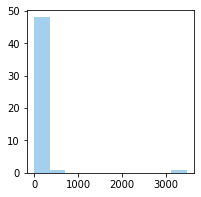

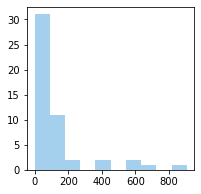

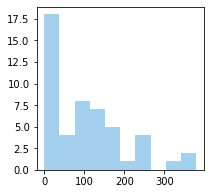

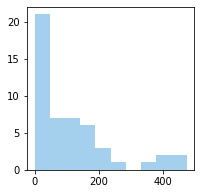

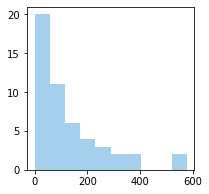

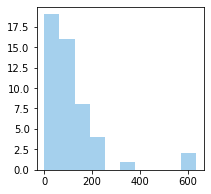

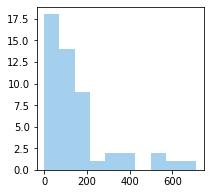

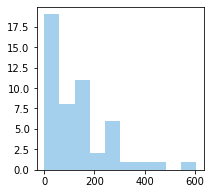

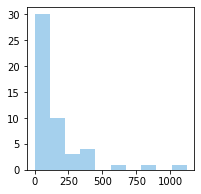

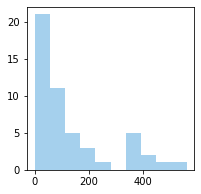

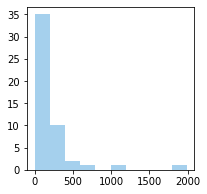

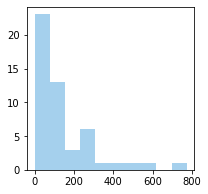

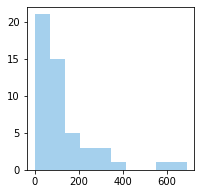

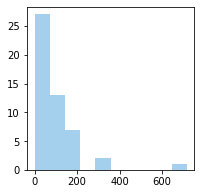

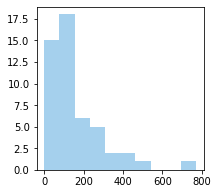

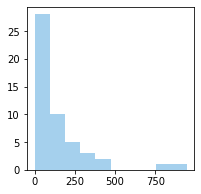

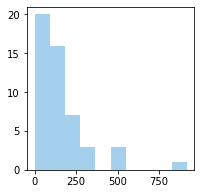

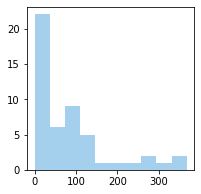

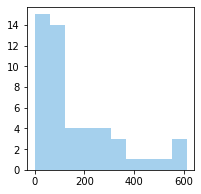

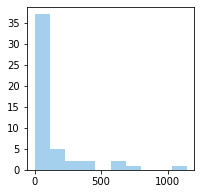

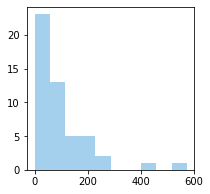

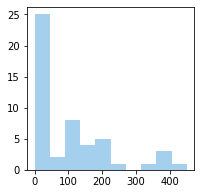

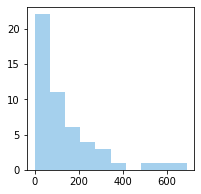

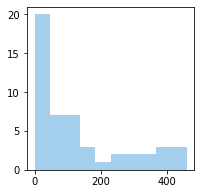

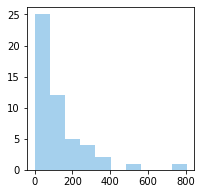

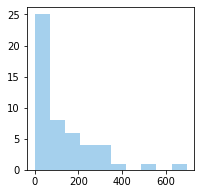

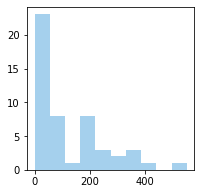

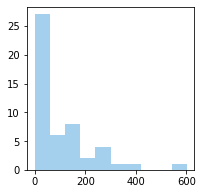

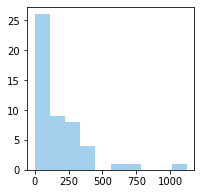

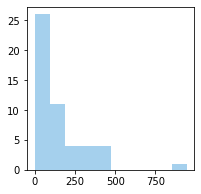

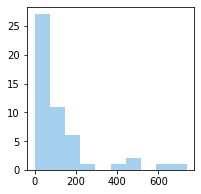

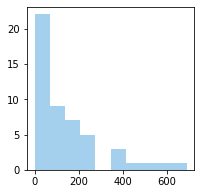

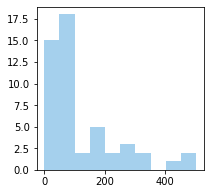

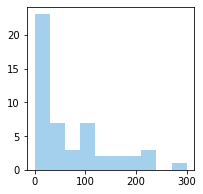

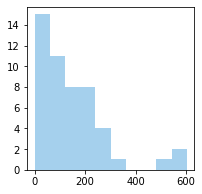

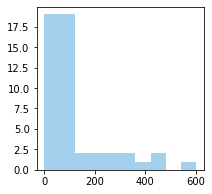

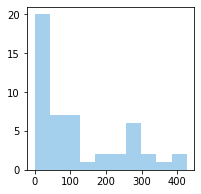

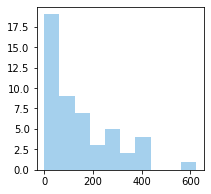

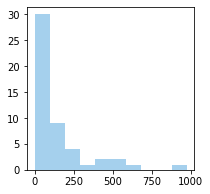

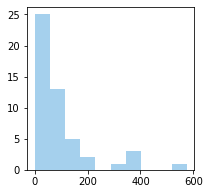

In [123]:
i = 0
for _ in range(100):
  plot_hist(i,i+50)
  i += 50